# Committor Analysis

The output from the `ops_parallel_committor` script can be used to do all the normal things that we do in a committor analysis. We use the item tagged as `'individual_runs'` to create a `ShootingPointAnalysis`, and we can do ahead and do the analysis.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import pandas as pd
pd.options.display.max_rows = 10

In [2]:
storage = paths.Storage("./committor.nc", 'r')

In [3]:
%%time
runs = storage.tags['individual_runs']
spa = paths.ShootingPointAnalysis.from_individual_runs(runs)

CPU times: user 13.2 s, sys: 1.37 s, total: 14.5 s
Wall time: 14.6 s


We'll go ahead and load a few other useful things from storage:

In [4]:
psi = storage.cvs['psi']
phi = storage.cvs['phi']
C_7eq = storage.volumes['C_7eq']
alpha_R = storage.volumes['alpha_R']

Now let's see how many times each initial snapshot landed in each state (reporting NaN if none of the trial shots landed there):

In [5]:
spa.to_pandas()

,alpha_R,C_7eq
0,1.0,7.0
1,3.0,5.0
2,2.0,6.0
3,NaN,8.0
4,4.0,4.0
...,...,...
45,1.0,7.0
46,5.0,3.0
47,3.0,5.0
48,5.0,3.0


To plot histograms in terms of certain values, we need a function that takes a snapshot and returns a float. These CVs return numpy arrays, so we have to turn those into floats.

In [6]:
psi_float = lambda snap: float(psi(snap))

Make the histogram and plot it!

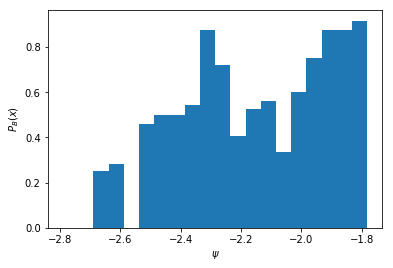

In [7]:
hist1D, bins = spa.committor_histogram(psi_float, alpha_R, bins=20)
bin_widths = [bins[i+1]-bins[i] for i in range(len(bins)-1)]
plt.bar(x=bins[:-1], height=hist1D, width=bin_widths, align='edge')
plt.xlabel("$\psi$")
plt.ylabel("$P_B(x)$");

We can also make 2D histograms of this information: again, we first need a function that converts a snapshot to a 2-tuple of floats (we'll call this one `ramachandran`), then we feed that to the histogram creator. 

In [8]:
ramachandran = lambda x : (float(phi(x)), float(psi(x)))
hist2D, bins_phi, bins_psi = spa.committor_histogram(ramachandran, alpha_R, bins=20)

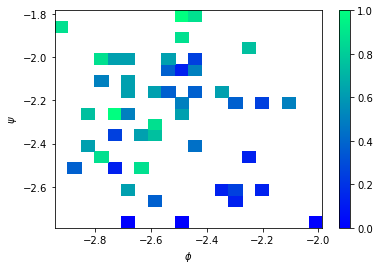

In [9]:
plt.pcolor(bins_phi, bins_psi, hist2D.T, cmap="winter")
plt.clim(0.0, 1.0)
plt.xlabel("$\phi$")
plt.ylabel("$\psi$")
plt.colorbar();